In [ ]:
#@title Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

### 1. Data Understanding

In [ ]:
train_df = pd.read_csv('/content/sample_data/california_housing_train.csv')
test_df = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [ ]:
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [ ]:
test_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [ ]:
train_df['total_rooms'] = train_df['total_rooms'].astype('int64')

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  int64  
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [ ]:
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672,552.0,1298.0,478.0,1.9797,85800.0


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


In [ ]:
train_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
test_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


In [ ]:
print(train_df.shape)
test_df.shape

(17000, 9)


(3000, 9)

### 2. Data Preprocessing

In [ ]:
print(train_df.isnull().mean()) ### In order to find there is a null or not
print(test_df.isnull().sum())

longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        0.0
population            0.0
households            0.0
median_income         0.0
median_house_value    0.0
dtype: float64
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


### 3. Exploratory Data Analysis

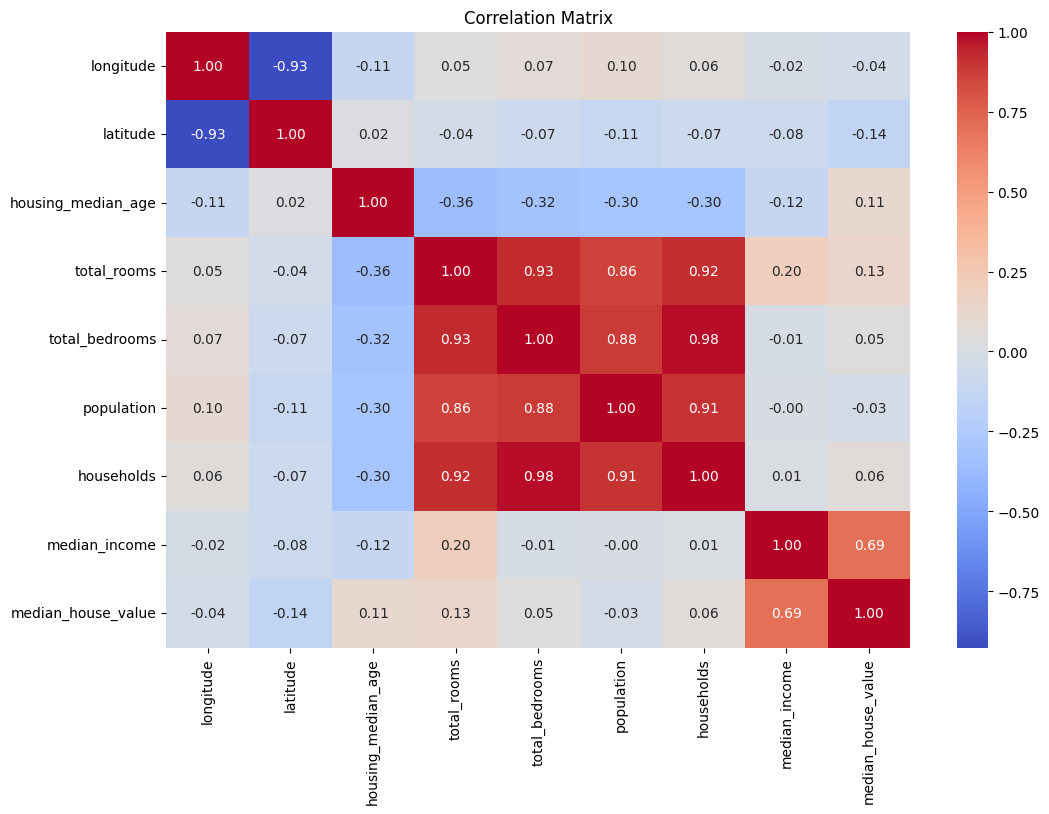

In [ ]:
correlation_matrix = train_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


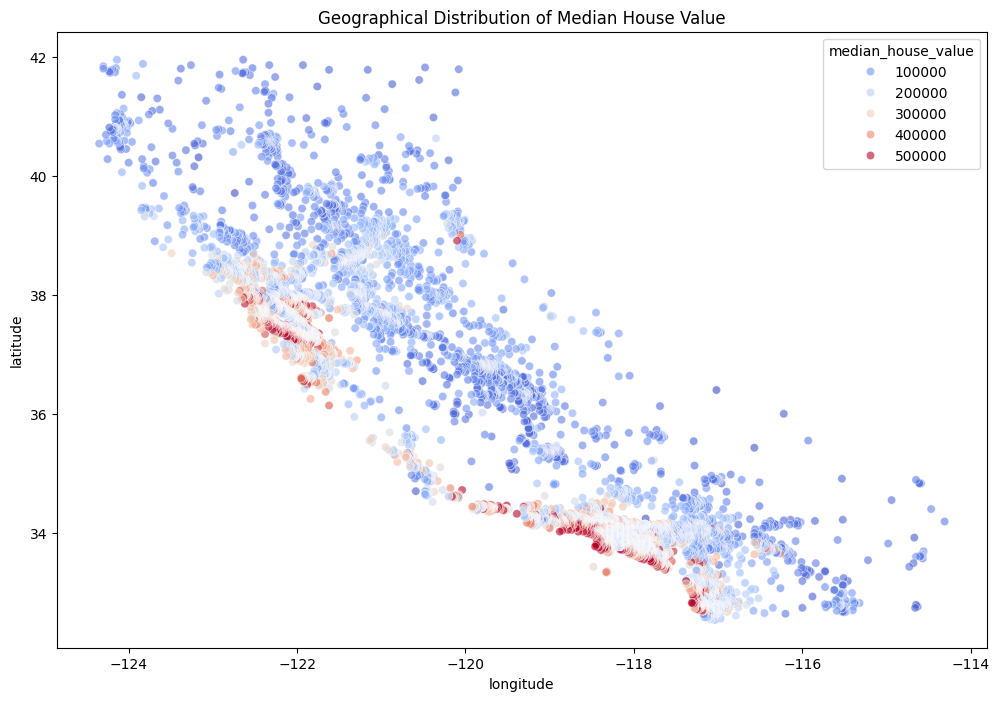

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', hue='median_house_value', palette='coolwarm', data=train_df, alpha=0.6)
plt.title('Geographical Distribution of Median House Value')
plt.show()


### 4. Data Modelling

In [ ]:
drop_col = train_df.drop(columns=['longitude','latitude'])
drop_col

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,15.0,5612,1283.0,1015.0,472.0,1.4936,66900.0
1,19.0,7650,1901.0,1129.0,463.0,1.8200,80100.0
2,17.0,720,174.0,333.0,117.0,1.6509,85700.0
3,14.0,1501,337.0,515.0,226.0,3.1917,73400.0
4,20.0,1454,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...
16995,52.0,2217,394.0,907.0,369.0,2.3571,111400.0
16996,36.0,2349,528.0,1194.0,465.0,2.5179,79000.0
16997,17.0,2677,531.0,1244.0,456.0,3.0313,103600.0
16998,19.0,2672,552.0,1298.0,478.0,1.9797,85800.0


In [ ]:
drop_col_test = test_df.drop(columns=['latitude','longitude'])
drop_col_test

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...
2995,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [ ]:
train_x = drop_col.iloc[:,:-1] # index location
train_y = drop_col[['median_house_value']]
test_x = drop_col_test.iloc[:,:-1]
test_y = drop_col_test[['median_house_value']]

In [ ]:
train_x

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,15.0,5612,1283.0,1015.0,472.0,1.4936
1,19.0,7650,1901.0,1129.0,463.0,1.8200
2,17.0,720,174.0,333.0,117.0,1.6509
3,14.0,1501,337.0,515.0,226.0,3.1917
4,20.0,1454,326.0,624.0,262.0,1.9250
...,...,...,...,...,...,...
16995,52.0,2217,394.0,907.0,369.0,2.3571
16996,36.0,2349,528.0,1194.0,465.0,2.5179
16997,17.0,2677,531.0,1244.0,456.0,3.0313
16998,19.0,2672,552.0,1298.0,478.0,1.9797


In [ ]:
train_x

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,15.0,5612,1283.0,1015.0,472.0,1.4936
1,19.0,7650,1901.0,1129.0,463.0,1.8200
2,17.0,720,174.0,333.0,117.0,1.6509
3,14.0,1501,337.0,515.0,226.0,3.1917
4,20.0,1454,326.0,624.0,262.0,1.9250
...,...,...,...,...,...,...
16995,52.0,2217,394.0,907.0,369.0,2.3571
16996,36.0,2349,528.0,1194.0,465.0,2.5179
16997,17.0,2677,531.0,1244.0,456.0,3.0313
16998,19.0,2672,552.0,1298.0,478.0,1.9797


In [ ]:
train_y

,median_house_value
0,66900.0
1,80100.0
2,85700.0
3,73400.0
4,65500.0
...,...
16995,111400.0
16996,79000.0
16997,103600.0
16998,85800.0


In [ ]:
#@markdown This part is in data preprocessing steps
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_x = ss.fit_transform(train_x)
train_y = ss.fit_transform(train_y)
test_x = ss.fit_transform(test_x)
test_y = ss.fit_transform(test_y)

In [ ]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(17000, 6)
(17000, 1)
(3000, 6)
(3000, 1)


In [ ]:
train_x

array([[-1.07967114,  1.36169494,  1.76420407, -0.36118401, -0.07599796,
        -1.25254316],
       [-0.76187201,  2.29660752,  3.23044127, -0.26186523, -0.09940441,
        -1.08148298],
       [-0.92077158, -0.88246225, -0.86695622, -0.95535424, -0.99925206,
        -1.17010515],
       ...,
       [-0.92077158,  0.01529238, -0.01995512, -0.16167524, -0.11760942,
        -0.44666313],
       [-0.76187201,  0.01299867,  0.02986848, -0.1146295 , -0.06039367,
        -0.99778717],
       [ 1.85997083, -0.377848  , -0.56801465, -0.54326844, -0.60134255,
        -0.45536288]])

In [ ]:
train_y

array([[-1.21055773],
       [-1.09674535],
       [-1.04846131],
       ...,
       [-0.89412482],
       [-1.04759909],
       [-0.97172417]])

In [ ]:
test_y

array([[ 1.22769852],
       [-0.25947002],
       [ 0.57164676],
       ...,
       [-1.27184099],
       [-0.38325337],
       [ 2.60081839]])

In [ ]:
%%time

reg = LinearRegression()
reg.fit(train_x,train_y) # fit = train # x , y

CPU times: user 5.8 ms, sys: 0 ns, total: 5.8 ms
Wall time: 4.98 ms


LinearRegression()

In [ ]:
y_predict = reg.predict(test_x)
y_predict

array([[ 1.14309299],
       [ 0.09341286],
       [ 0.60287475],
       ...,
       [-1.02625986],
       [-0.15373638],
       [ 2.10575854]])

In [ ]:
%load_ext cuml.accel

[2025-04-12 07:46:42.556] [CUML] [info] cuML: Installed accelerator for sklearn.
[2025-04-12 07:47:07.842] [CUML] [info] cuML: Installed accelerator for umap.
[2025-04-12 07:47:07.905] [CUML] [info] cuML: Installed accelerator for hdbscan.
[2025-04-12 07:47:07.905] [CUML] [info] cuML: Successfully initialized accelerator.


In [ ]:
%%time

reg = LinearRegression()
reg.fit(train_x,train_y) # fit = train # x , y

CPU times: user 4.44 ms, sys: 53 µs, total: 4.49 ms
Wall time: 4.16 ms


LinearRegression()

### 5. Data Evaluation

In [ ]:
print('Training Score:',reg.score(train_x,train_y))
print('Testing Score:',reg.score(test_x,test_y))

Training Score: 0.5713482748283873
Testing Score: 0.546038251349136


In [ ]:
mse = mean_squared_error(test_y, y_predict)
mse

0.45396174865086414

In [ ]:
mae = mean_absolute_error(test_y,y_predict)
mae

0.49272391016802963

In [ ]:
summ = sum([(y-y_predict)**2 for y,y_predict in zip(test_y,y_predict)])

In [ ]:
mse_error = summ/len(test_y)

In [ ]:
mse_error

array([0.45396175])